<a href="https://colab.research.google.com/github/Abraham-Nispel/Data_analytics_projects/blob/main/DESCRIPTIVE_PROJECTS/01_Data_analytics_bikesales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIKE SALES DESCRIPTIVE ANALYTICS ANALYSIS

## Abstract
December, a month preceding the festive season, represents a critical period for many businesses, particularly medium and small enterprises. For our company, December sales significantly contribute to annual profits. Therefore, analysing company performance during this month is crucial for maximising profit and minimising operational costs through strategic planning for future years.
This report aims to investigate the overall business performance of the Bike Company across its branches during December 2021, contributing to a better understanding of sales performance. A descriptive-analytical approach is employed to analyze sales data from the first 24 days of December, revealing insights into branch performance and profitability.
The findings indicate that the United States and Australia were the strongest markets in terms of both sales and profitability. Additionally, the customer base primarily comprised individuals in their mid-thirties, demonstrating a clear preference for the high-selling and profitable Mountainbike-200 model.
While the current results provide a snapshot of the company's performance, further data collection is necessary to develop analytical models for forecasting future sales performance in order to improve strategic planning.

## Contents


1. Introduction
2. Data Collection
3. Data Processing
4. Data Analysis
5. Discussions
6. Conclusions



# 1.Introduction
In this section the background, goals, objectives and scope of the project are descibed and defined.
This section outlines the project's background, goals, objectives, and scope.
### 1.1 Background
December is the most critical sales month for our mid-sized company compared to the rest of the year. We are committed to maximising profits and minimising operational costs across branches, while maintaining customer service and product quality. Analysing December sales data provides valuable insights into customer needs, informing decisions related to asset management, supply chain optimisation, and new project launches. Due to the festive season rush, December consistently generates the highest sales and profits for the company. However, a lack of planning has led to cost increases, particularly in supply, stock management, and overtime. Consequently, analysing December data is crucial for two key reasons:
1.	Gaining a clear understanding of company performance.
2.	Developing guidelines to improve future decision-making based on past performance.

### 1.2 Goal
To gain a clear understanding of the company's performance, this report aims to investigate the overall business performance of the Bike company across its branches during December.
### 1.3 Objectives
To achieve the project's goal, the following objectives were established:
* Describe the monthly sales performance across company branches.
*	Describe the monthly profitability of the company across its branches.

### 1.4 Scope
This project analyses bike sales data from all countries where the company operates to provide a clear picture of company performance in December 2021. The primary focus is on using descriptive analytics techniques to understand the current state of the company. Prescriptive or predictive analysis of future performance falls outside the scope of this report.






# 2 Methods
In this section the techniques employed to collect, and to process the data for analysis are described. The section is divided as follows:
1. Getting the Data
2. Processing the Data


In [1]:
#@title SETUP: Install common libraries and imports.

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 2.1 Getting the Data
In this section relevant information about the data is presented.

### 2.1.1 Data source
The data correspond to the bike sales during the month of december 2021. The data is located in the following repository in a .csv file currently available for free use ([link]("https://raw.githubusercontent.com/Abraham-Nispel/AN_databases_new/main/Bike_Sales_Prepare_Lab_3.4.7_csv.csv")).  


### 2.1.2 Data characteristics
Table 1 shows the original dataset, which comprises 89 rows and 19 columns. Each row represents information about a sales order, including location and type. There are five numerical features: two continuous and three discrete. The remaining fourteen features are textual. Notably, there are few missing values, primarily in the "day" column, and some typing errors such as leading and trailing spaces.

Information on numerical features is presented in Table 3 and Figure 1. Table 3 suggests that continuous features like profit and cost, and discrete features like order quality, are listed as text in Table 1. These variables may therefore require transformation for further analysis. Notably, Table 3 also displays feature statistics. Most values seem reasonable, aligning with real-world values (e.g., customer age) and expected spread. Figure 1 visually depicts the distribution of features. It allows us to observe, for instance, that the data covers a year, the number of days is capped at 24, and there is limited variation in sales numbers. Interestingly, both unit price and cost price exhibit minimal variation, potentially qualifying them as categorical variables.

On the other hand, the text features primarily focus on information such as location (country and state), product characteristics (category, subcategories, and description), and demographics (customer age and gender).

One element to consider is the amount of information per row, particularly for features like product description, where details like model, size, and colour pack are currently combined in a single column. Additionally, as shown in Table 1, the USA appears three times, which suggests potential trailing whitespace issues. There are also some spelling issues in the categorical feature "month".

Overall, while the dataset is well-structured with few missing values, it's important to address issues related to object variables to avoid errors during the following analysis stages.



In [27]:
#@title Step 1: Upload Data

# Upload the CSV file from the URL
url_pinguin = "https://raw.githubusercontent.com/Abraham-Nispel/AN_databases_new/main/Bike_Sales_Prepare_Lab_3.4.7_csv.csv"
in_data = pd.read_csv(url_pinguin)

# Check data types
print("\nTABLE 1: Data features Information")
in_data.info()

# Print the CSV file to the console
in_data.head()


TABLE 1: Data features Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_Order #        89 non-null     int64  
 1   Date                 89 non-null     object 
 2   Day                  88 non-null     float64
 3   Month                89 non-null     object 
 4   Year                 89 non-null     int64  
 5   Customer_Age         89 non-null     int64  
 6   Age_Group            88 non-null     object 
 7   Customer_Gender      89 non-null     object 
 8   Country              89 non-null     object 
 9   State                89 non-null     object 
 10  Product_Category     89 non-null     object 
 11  Sub_Category         89 non-null     object 
 12  Product_Description  88 non-null     object 
 13  Order_Quantity       88 non-null     float64
 14   Unit_Cost           89 non-null     object 
 15   Unit_

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,01/12/2021,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
1,261695,01/12/2021,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
2,261697,02/12/2021,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,$420.00,$769.00,$698.00,$840.00,"$1,538.00"
3,261698,02/12/2021,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,$420.00,$769.00,$349.00,$420.00,$769.00
4,261699,03/12/2021,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,$0.00,"$2,295.00","$2,086.00",$0.00,"$4,590.00"


The following columns have been converted to numeric values

Unit_Cost, Unit_Price, Profit, Cost

TABLE 2: Catergorical features Information

 Product_Description
Mountain-200 Black, 46       15
Mountain-200 Silver, 38      14
Mountain-200 Black, 38       13
Mountain-200 Silver, 42       9
Mountain-200 Black, 42        7
Mountain-400-W Silver, 46     6
Mountain-400-W Silver, 42     4
Mountain-200 Silver, 46       4
Mountain-500 Silver, 42       3
Mountain-500 Black, 40        2
Mountain-500 Black, 42        2
Mountain-100 Black, 38        2
Mountain-400-W Silver, 38     2
Mountain-100 Silver, 44       1
Mountain-500 Silver, 40       1
Mountain-500 Black, 44        1
Mountain-100 Black, 48        1
Mountain-500 Black, 52        1
Name: count, dtype: int64

 Country
United States     30
Australia         27
United Kingdom     9
France             8
Germany            6
Canada             6
 United States     1
United  States     1
United States      1
Name: count, dtype: int64

 State
Ca

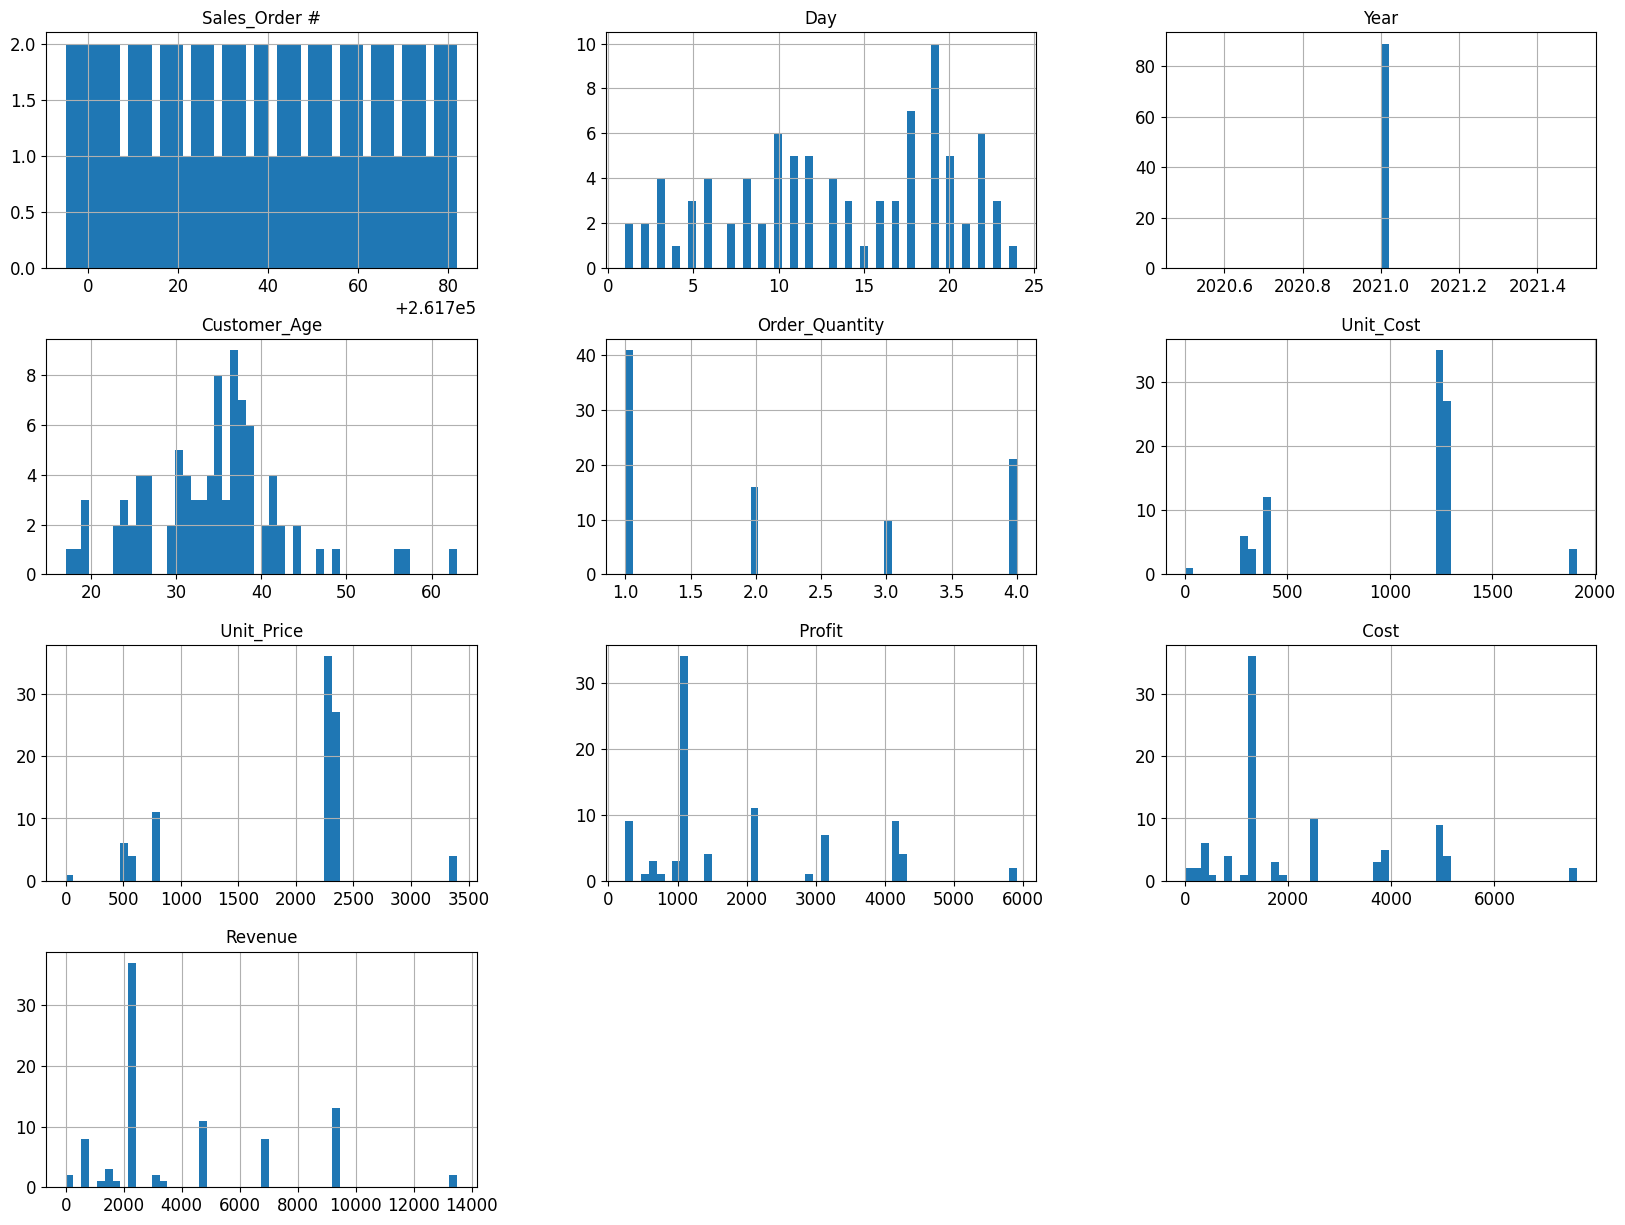

In [28]:
#@title Step 2: Provide intial dataset characteristics

# Initial transformations
# Remove dollar signs, commas, and trailing spaces, then convert to float
if in_data[" Cost "].dtype == 'object':
  # Transform object to numeric
  in_data[" Unit_Cost "] = in_data[" Unit_Cost "].str.replace("$", "").str.replace(",", "").str.strip().astype(np.float64)
  in_data[" Unit_Price "] = in_data[" Unit_Price "].str.replace("$", "").str.replace(",", "").str.strip().astype(np.float64)
  in_data[" Profit "] = in_data[" Profit "].str.replace("$", "").str.replace(",", "").str.strip().astype(np.float64)
  in_data[" Cost "] = in_data[" Cost "].str.replace("$", "").str.replace(",", "").str.strip().astype(np.float64)
  in_data["Revenue"] = in_data["Revenue"].str.replace("$", "").str.replace(",", "").str.strip().astype(np.float64)
  print('The following columns have been converted to numeric values\n',)
  print("Unit_Cost, Unit_Price, Profit, Cost")
else:
  # Do something else if " Cost " is not an object
  print('The following columns have been converted to numeric values\n',)
  print("Unit_Cost, Unit_Price, Profit, Cost")

# Check categorical data characteristics
print("\nTABLE 2: Categorical features Information")
print("\n",in_data["Product_Description"].value_counts())
print("\n",in_data["Country"].value_counts())
print("\n",in_data["State"].value_counts())
print("\n",in_data["Month"].value_counts())



# Check numeric data characteristics
print("\nTABLE 3: Numeric features Information")
print(in_data.describe())

# Numeric data visualsation
print("\nFIGURE 1: Numeric features visualisation")
in_data.hist(bins=50, figsize=(20,15))
plt.show()

## 2.2 Data Processing
In this step the essential steps of cleaning data are explored. Data needs to be processed before it can be analysed. Cleaning the data makes it easier to read and interpret, ensures consistency and accurate results, and enables a better decision-making process.

### 2.2.1 Pre-processing
In this section the missing values (NaN) in the dataset were analysed. Table 4 shows that only three values were missing across all features, with two being categorical and one numerical. Three common techniques exist for replacing NaN values: mean/median value replacement, dropping entire columns, and dropping rows with missing data. In this case, dropping the rows containing missing values was chosen because the missing data represents a small percentage of the dataset, and imputing descriptive variables (categorical data) is difficult without any information.


In [4]:
#@title SECTION SETUP (general and text processing)
# Install additional libraries
!pip install textblob
!python -m textblob.download_corpora

# Load additional libraries
from textblob import TextBlob
import re

# FUNCTIONS
# DEFINE FUNCTIONS
def columns_with_leading_trailing_spaces(df):
    """
    This function identifies and prints the columns in a dataframe that have leading, trailing, or multiple (mid) spaces.
    Args:
        df (pd.DataFrame): The dataframe to check.
    Returns:
        list: A list of column names that have leading, trailing, or multiple spaces.
    """

    columns_with_spaces = []
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of string type
            # Use regular expressions to check for leading, trailing, or multiple spaces
            if df[column].str.contains('^\s+|\s+$|\s{2,}').any():
                columns_with_spaces.append(column)

                # Remove leading, trailing, and multiple spaces
                df[column] = df[column].str.strip().str.replace('\s+', ' ', regex=True)

    if not columns_with_spaces:
        print("There are no columns with leading, trailing, or multiple spaces.")
    else:
        print("\nColumns with leading, trailing, or multiple spaces:")
        for column in columns_with_spaces:
            print(f"\t- {column}")

    return columns_with_spaces

#-----------------------------
def find_missing_values(df):
    """
    This function identifies and prints missing values in a dataframe.
    Args:
        df (pd.DataFrame): The dataframe containing the data.
    Returns:
        pd.DataFrame: A dataframe containing only the rows with missing values.
    """

    # Identify missing values
    missing_values = df.isnull().any(axis=1)

    # Print total number of missing values and their percentage
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    missing_percentage = (total_missing / total_cells) * 100

    print(f"Total number of missing values: {total_missing}")
    print(f"Percentage of missing values: {missing_percentage:.2f}%")

    # Print a table with the number of missing values per column and their percentage
    missing_values_per_column = df.isnull().sum()
    missing_percentage_per_column = np.round((df.isnull().sum() / df.shape[0]) * 100,2)

    missing_table = pd.DataFrame({
        'Number of Missing Values': missing_values_per_column,
        'Percentage of Missing Values': missing_percentage_per_column
    })

    print("\nMissing Values per Column:")
    print(missing_table)

    # Print a table with the location of missing values
    print("\nLocation of Missing Values:[Row & Column] ")
    for i, row in df[missing_values].iterrows():
        for j, column in enumerate(df.columns):
            if pd.isna(row[column]):
                #print(f"Row: {i}, Column: {column}")
                print(f"[{i},'{column}'] ")

    # Print a table with all columns but only the rows with missing values
    #print("\nTable with Missing Values:")
    return df[missing_values]
# spelling functions
# Functions
def check_spelling(text):
    """
    This function checks the spelling of words in a given text.
    Args:
        text (str): The text to check for spelling errors.
    Returns:
        list: A list of misspelled words found in the text.
    """
    # Compile a regular expression to match words
    word_regex = re.compile(r"\w+")

    # Extract all words from the text
    words = word_regex.findall(text)

    # Check the spelling of each word
    misspelled_words = []
    for word in words:
        blob = TextBlob(word)
        if word != blob.correct().string:
            misspelled_words.append(word)

    return misspelled_words

# Function to check and return only the misspelled words for each entry in the DataFrame
def find_misspelled_words(df, column):
    all_misspelled_words = []
    for entry in df[column]:
        misspelled_words = check_spelling(entry)
        if misspelled_words:
            all_misspelled_words.extend(misspelled_words)

    return all_misspelled_words
# Funtion to replace words
def replace_word_in_row(df, column_name, old_word, new_word):
    """
    This function replaces a word in a specific row of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to modify.
        old_word (str): The word to replace.
        new_word (str): The new word to insert.

    Returns:
        pd.DataFrame: The modified DataFrame.
    """

    # Iterate over each row in the specified column
    for index, row in df.iterrows():
        if old_word in row[column_name]:
            # Replace the old word with the new word in the entire column
            df[column_name] = df[column_name].str.replace(old_word, new_word)
            break  # Stop iterating once the first occurrence is replaced

    return df

# numerical analysis functions----------------------------------------------------------------
# Function to find rows with zeros in the specified columns
def find_zeros(df, col_names):
    """
    This function identifies and prints rows with zeros in the specified columns of a dataframe.
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        col_names (list): List of column names to check for zeros.
    Returns:
        pd.DataFrame: A dataframe containing only the rows with zeros in the specified columns.
    """

    # Identify rows with zeros in the specified columns
    zeros_indices = df[(df[col_names] == 0).any(axis=1)].index

    # Return the rows with zeros in the specified columns
    return df.loc[zeros_indices]

# Find duplicates.
def analyze_duplicates(df, columns):
    """
    Analyzes duplicates in a list of columns of the dataset.

    Args:
        df (pd.DataFrame): The dataset to analyze.
        columns (list): List of columns to check for duplicates.

    Returns:
        tuple: A tuple containing:
            - DataFrame with original and duplicate values.
            - List of indices of duplicates in the format (index, column).
    """
    duplicates_df = pd.DataFrame()
    duplicate_indices = []

    for col in columns:
        # Find duplicate indices
        duplicate_indices_col = df[df.duplicated(subset=[col], keep=False)].index.tolist()

        # Find duplicate rows
        duplicate_rows_col = df.loc[duplicate_indices_col]

        # Append duplicates to the final DataFrame
        duplicates_df = pd.concat([duplicates_df, duplicate_rows_col])

        # Find individual duplicate indices
        for idx in duplicate_indices_col:
            duplicate_indices.append((idx, col))

    # Drop duplicate rows from the final DataFrame to keep unique rows only
    duplicates_df = duplicates_df.drop_duplicates()

    return duplicates_df, duplicate_indices
#  Drop rows by index
def drop_rows_by_indices(df, indices):
  """
  Drops rows from a dataframe based on a list of indices.
  Args:
      df (pd.DataFrame): The dataframe to modify.
      indices (list): List of row indices to drop.
  Returns:
      pd.DataFrame: The modified dataframe with the specified rows dropped.
  """
  # Drop the rows based on the provided indices
  df.drop(indices, inplace=True)
  return df
## Create a copy of the original dataset-------------------------------------
in_data_copy = in_data.copy()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [5]:
#@title Pre-processing
# Find and print missing values
missing_values_table = find_missing_values(in_data_copy)
#print("\nTable with Missing Values:")
#print(missing_values_table)

# Remove rows with missing values
print("\nTABLE 4: Missing values assessment")
in_data_copy.dropna(inplace=True)

Total number of missing values: 4
Percentage of missing values: 0.24%

Missing Values per Column:
                     Number of Missing Values  Percentage of Missing Values
Sales_Order #                               0                          0.00
Date                                        0                          0.00
Day                                         1                          1.12
Month                                       0                          0.00
Year                                        0                          0.00
Customer_Age                                0                          0.00
Age_Group                                   1                          1.12
Customer_Gender                             0                          0.00
Country                                     0                          0.00
State                                       0                          0.00
Product_Category                            0                     

## 2.2.2 Categorical data processing
### Identify and remove trailing spaces (leading, middle, and after).
Table 4 shows the analysis of the spaces. From the analysis it was found trailing spaces and in-between spaces in the column names and values in the "Country" column. To ensure consistency, these spaces were removed, including those between words like "United States".

### Transform text case (lower-upper) case for consistency.
The case of the words in the column names and entries are mix between upper and lower case; as a result, it was changed to lowercase for consistency.

### Spelling
 A spelling check was conducted to verify the spelling within the "text cell, see Table 6." From the analysis, only one word, e.i dcember, was found and corrected.

### Analyse cells with mix information, and break up if necesary.

Finally, the orinal column "product_description" was splitted in three columns "product_description", "colour", and "size". The new columns can be seen in Table 7.

In [6]:
#@title Categorical data processing (part 1)
# Remove trailing spaces____________________________________________________________________________________
print("\nTABLE 4: Trailing, leading and in between spaces assessment")
# Part 1: Check for spaces in column titles
print("\nColumn names before removing spaces:")
print(in_data_copy.columns.tolist())
# Strip leading and trailing spaces from column names
in_data_copy.columns = in_data_copy.columns.str.strip()
# Print modified column names
print("\nModified column names:")
print(in_data_copy.columns.tolist())

# Part 2: Identify and remove spaces in columns
cleaned_columns = columns_with_leading_trailing_spaces(in_data_copy)
# Check.
print("\nModified column value:")
print("\n",in_data_copy["Country"].value_counts())

# Change the case of columns to lower case
in_data_copy.columns = in_data_copy.columns.str.lower()
# Change the case of "countries" data from upper case to lower case
text_columns = ['country', 'state']
in_data_copy['country'] = in_data_copy['country'].str.lower()

## CASE CONSISTENCY----------------------------------------------------------
print("\nTABLE 5: Text case assessment")
# Change the case of columns to lower case
in_data_copy.columns = in_data_copy.columns.str.lower()
# Change the case of "countries" data from upper case to lower case
text_columns = ['country', 'state',"month","age_group","sub_category","product_description","product_category"]
for column in text_columns:
  in_data_copy[column] = in_data_copy[column].str.lower()

## SPELLING------------------------------------------------------------------
# Find the misspelled words in the "Country" column
mis_colum =["month","country","state"]
misspelled_words_list = find_misspelled_words(in_data_copy, mis_colum)

# Print the misspelled words
print("\nTABLE : Text spelling assessment")
print("\nMisspelled words:")
print(misspelled_words_list)

## Replace "Unitd" with "United" in the "Country" column
in_data_copy = replace_word_in_row(in_data_copy, "month", "decmber", "december")



Column names before removing spaces:
['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ', ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue']

Modified column names:
['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product_Description', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

Columns with leading, trailing, or multiple spaces:
	- Country

Modified column value:

 Country
United States     31
Australia         26
United Kingdom     9
France             8
Canada             6
Germany            5
Name: count, dtype: int64

Misspelled words:
[]


,sales_order #,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product_description,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,01/12/2021,1.0,december,2021,39,adults (35-64),F,united states,california,bikes,mountain bikes,"mountain-200 black, 46",4.0,1252.0,2295.0,4172.0,5008.0,9180.0
1,261695,01/12/2021,1.0,december,2021,44,adults (35-64),M,united kingdom,england,bikes,mountain bikes,"mountain-200 silver, 42",1.0,1266.0,2320.0,1054.0,1266.0,2320.0
2,261697,02/12/2021,2.0,december,2021,37,adults (35-64),M,united states,california,bikes,mountain bikes,"mountain-400-w silver, 46",2.0,420.0,769.0,698.0,840.0,1538.0
3,261698,02/12/2021,2.0,december,2021,31,young adults (25-34),F,australia,new south wales,bikes,mountain bikes,"mountain-400-w silver, 42",1.0,420.0,769.0,349.0,420.0,769.0
4,261699,03/12/2021,3.0,december,2021,37,adults (35-64),F,united states,california,bikes,mountain bikes,"mountain-200 black, 46",2.0,0.0,2295.0,2086.0,0.0,4590.0


In [7]:
#@title Categorical data processing (part 2)
# Parsing (Splitting cells)
# Split the "Product_Description" column into "model", "colour", and "size"
# First, split by space only once to separate model and the rest
in_data_copy[['model', 'remainder']] = in_data_copy['product_description'].str.split(' ', n=1, expand=True)

# Then, split the remainder by comma to get colour and size
in_data_copy[['colour', 'size']] = in_data_copy['remainder'].str.split(',', n=1, expand=True)

# Remove leading and trailing whitespaces from the new columns
in_data_copy['colour'] = in_data_copy['colour'].str.strip()
in_data_copy['size'] = in_data_copy['size'].str.strip()

# Drop the 'remainder' column as it is no longer needed
in_data_copy = in_data_copy.drop(columns=['remainder'])

# Insert the new columns immediately after the 'Product_Description' column
cols = list(in_data_copy.columns)
product_desc_index = cols.index('product_description')
new_cols = ['model', 'colour', 'size']

for col in reversed(new_cols):
    cols.insert(product_desc_index + 1, cols.pop(cols.index(col)))

in_data_copy = in_data_copy[cols]

# Drop the 'Product_Description' column
in_data_copy = in_data_copy.drop(columns=['product_description'])

# Print the first 20 rows of the dataframe
print("\nTABLE 7: Modify dataset with new columns:")
in_data_copy.head(5)


,sales_order #,date,day,month,year,customer_age,age_group,customer_gender,country,state,...,sub_category,model,colour,size,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,01/12/2021,1.0,december,2021,39,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,4.0,1252.0,2295.0,4172.0,5008.0,9180.0
1,261695,01/12/2021,1.0,december,2021,44,adults (35-64),M,united kingdom,england,...,mountain bikes,mountain-200,silver,42,1.0,1266.0,2320.0,1054.0,1266.0,2320.0
2,261697,02/12/2021,2.0,december,2021,37,adults (35-64),M,united states,california,...,mountain bikes,mountain-400-w,silver,46,2.0,420.0,769.0,698.0,840.0,1538.0
3,261698,02/12/2021,2.0,december,2021,31,young adults (25-34),F,australia,new south wales,...,mountain bikes,mountain-400-w,silver,42,1.0,420.0,769.0,349.0,420.0,769.0
4,261699,03/12/2021,3.0,december,2021,37,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,2.0,0.0,2295.0,2086.0,0.0,4590.0


## 2.2.3 Numerical Processing
### Duplicates
In this sub-section  duplicate values in the purchase ID were assessed. As it can be seen in Table 8, there were duplicate vales in rows 1 and 7. While rows 0 and 1 share the same sales ID, their information across the  different columns differ. Conversely, rows 6 and 7 exhibited identical values across all features. Therefore, the duplicate in row 1 likely represents a typo on the ID and should be retained, whereas row 7 represents a duplicate can be safely deleted without affecting the dataset.

### Zeros analysis
In this section zero values in the following numerical  columns: "unitary cost," "cost," "profit," and "revenue,"  were analysed as real-world scenarios wouldn't contain zero values in these fields. As shown in Table 9, four zero values were identified. Two (unit cost and unit price) were replaced with the mean value, while the remaining two (cost and revenue) were calculated from other quantities.

In [8]:
#@title SECTION SETUP (numerical processing)
# numerical analysis functions----------------------------------------------------------------
# Function to find rows with zeros in the specified columns
def find_zeros(df, col_names):
    """
    This function identifies and prints rows with zeros in the specified columns of a dataframe.
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        col_names (list): List of column names to check for zeros.
    Returns:
        pd.DataFrame: A dataframe containing only the rows with zeros in the specified columns.
    """

    # Identify rows with zeros in the specified columns
    zeros_indices = df[(df[col_names] == 0).any(axis=1)].index

    # Return the rows with zeros in the specified columns
    return df.loc[zeros_indices]

# Find duplicates.
def analyze_duplicates(df, columns):
    """
    Analyzes duplicates in a list of columns of the dataset.

    Args:
        df (pd.DataFrame): The dataset to analyze.
        columns (list): List of columns to check for duplicates.

    Returns:
        tuple: A tuple containing:
            - DataFrame with original and duplicate values.
            - List of indices of duplicates in the format (index).
    """
    duplicates_df = pd.DataFrame()
    duplicate_indices = set()

    for col in columns:
        # Find duplicate indices for the current column
        duplicate_indices_col = df[df.duplicated(subset=[col], keep=False)].index.tolist()

        # Add these indices to the set of all duplicate indices
        duplicate_indices.update(duplicate_indices_col)

    # Create a DataFrame with the original and duplicate rows
    duplicates_df = df.loc[sorted(duplicate_indices)]

    return duplicates_df, list(duplicate_indices)

#  Drop rows by index
def drop_rows_by_indices(df, indices):
  """
  Drops rows from a dataframe based on a list of indices.
  Args:
      df (pd.DataFrame): The dataframe to modify.
      indices (list): List of row indices to drop.
  Returns:
      pd.DataFrame: The modified dataframe with the specified rows dropped.
  """
  # Drop the rows based on the provided indices
  df.drop(indices, inplace=True)
  return df

In [9]:
#@title Numerica data processing (part 1)
#Duplicate values analysis
columns_to_check = ['sales_order #']
duplicates_df, duplicate_indices = analyze_duplicates(in_data_copy, columns_to_check)
print("\nTABLE 8: Duplicates assessment")
print("\nDuplicate Indices:")
print(duplicate_indices)
print("Duplicates DataFrame:")
print(duplicates_df)

# Drop duplicate values
drop_id = [7]
drop_rows_by_indices(in_data_copy,drop_id)


Duplicate Indices:
[0, 1, 6, 7]
Duplicates DataFrame:
   sales_order #        date  day     month  year  customer_age  \
0         261695  01/12/2021  1.0  december  2021            39   
1         261695  01/12/2021  1.0  december  2021            44   
6         261701  03/12/2021  3.0  december  2021            37   
7         261701  03/12/2021  3.0  december  2021            37   

        age_group customer_gender         country       state  ...  \
0  adults (35-64)               F   united states  california  ...   
1  adults (35-64)               M  united kingdom     england  ...   
6  adults (35-64)               M   united states  washington  ...   
7  adults (35-64)               M   united states  washington  ...   

     sub_category         model  colour size order_quantity  unit_cost  \
0  mountain bikes  mountain-200   black   46            4.0     1252.0   
1  mountain bikes  mountain-200  silver   42            1.0     1266.0   
6  mountain bikes  mountain-200   bl

,sales_order #,date,day,month,year,customer_age,age_group,customer_gender,country,state,...,sub_category,model,colour,size,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,01/12/2021,1.0,december,2021,39,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,4.0,1252.0,2295.0,4172.0,5008.0,9180.0
1,261695,01/12/2021,1.0,december,2021,44,adults (35-64),M,united kingdom,england,...,mountain bikes,mountain-200,silver,42,1.0,1266.0,2320.0,1054.0,1266.0,2320.0
2,261697,02/12/2021,2.0,december,2021,37,adults (35-64),M,united states,california,...,mountain bikes,mountain-400-w,silver,46,2.0,420.0,769.0,698.0,840.0,1538.0
3,261698,02/12/2021,2.0,december,2021,31,young adults (25-34),F,australia,new south wales,...,mountain bikes,mountain-400-w,silver,42,1.0,420.0,769.0,349.0,420.0,769.0
4,261699,03/12/2021,3.0,december,2021,37,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,2.0,0.0,2295.0,2086.0,0.0,4590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,261778,22/12/2021,22.0,december,2021,41,adults (35-64),M,germany,hessen,...,mountain bikes,mountain-200,silver,38,1.0,1266.0,2320.0,1054.0,1266.0,2320.0
85,261779,23/12/2021,23.0,december,2021,30,young adults (25-34),F,united states,oregon,...,mountain bikes,mountain-200,silver,42,1.0,1266.0,2320.0,1054.0,1266.0,2320.0
86,261780,23/12/2021,23.0,december,2021,31,young adults (25-34),F,canada,british columbia,...,mountain bikes,mountain-200,black,42,1.0,1252.0,2295.0,1043.0,1252.0,2295.0
87,261781,23/12/2021,23.0,december,2021,35,adults (35-64),F,united states,california,...,mountain bikes,mountain-500,black,42,1.0,295.0,540.0,245.0,295.0,540.0


In [10]:
#@title Numerical data processing (part 2)
# Zeros analysis
columns_to_check = ['unit_price','unit_cost', 'cost', 'profit']
zeros_df = find_zeros(in_data_copy, columns_to_check)
print("\nZeros DataFrame:")
print(zeros_df)

# Replace vales with averages
mountain_200_unit_cost_average = in_data_copy.loc[in_data_copy['model'] == 'mountain-200', 'unit_cost'].mean()
mountain_400_unit_price_average = in_data_copy.loc[in_data_copy['model'] == 'mountain-400-w', 'unit_price'].mean()

in_data_copy.loc[4,'unit_cost']=mountain_200_unit_cost_average
in_data_copy.loc[8,'unit_price']=mountain_400_unit_price_average
#--------------------------------------------------------------------------------------------
# Replace values in revenue and cost by calculations
columns_to_check = ['cost', 'profit','revenue']
zeros_df = find_zeros(in_data_copy, columns_to_check)
print("\nTABLE 9: Zero-values assessment")
print("\nZeros DataFrame:")
print(zeros_df)

in_data_copy.loc[4,'cost']=in_data_copy.loc[8,'revenue']-in_data_copy.loc[8,'profit']
in_data_copy.loc[8,'revenue']=in_data_copy.loc[8,'cost']+in_data_copy.loc[8,'profit']


Zeros DataFrame:
   sales_order #        date  day     month  year  customer_age  \
4         261699  03/12/2021  3.0  december  2021            37   
8         261702  04/12/2021  4.0  december  2021            31   

              age_group customer_gender        country            state  ...  \
4        adults (35-64)               F  united states       california  ...   
8  young adults (25-34)               F      australia  new south wales  ...   

     sub_category           model  colour size order_quantity  unit_cost  \
4  mountain bikes    mountain-200   black   46            2.0        0.0   
8  mountain bikes  mountain-400-w  silver   42            4.0      420.0   

   unit_price  profit    cost  revenue  
4      2295.0  2086.0     0.0   4590.0  
8         0.0  1396.0  1680.0      0.0  

[2 rows x 21 columns]

Zeros DataFrame:
   sales_order #        date  day     month  year  customer_age  \
4         261699  03/12/2021  3.0  december  2021            37   
8         26

In [36]:
#@title Check and Save processed dataset.
# Save processed dataset
# Define the directory path
# raw = 'C:\Users\ABRAH\Downloads'
directory_path = r'C:\Users\ABRAH\Box\boxx\Courses\Machine learning'

# Define the file path and name
file_name = 'processed_data.csv'
file_path = f'{directory_path}\processed_data.csv'

# Save the dataset to the specified directory
in_data_copy.to_csv(file_path, index=False)

# Check dataset
processed_data.head(20)


,sales_order #,date,day,month,year,customer_age,age_group,customer_gender,country,state,...,sub_category,model,colour,size,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,01/12/2021,1.0,december,2021,39,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,4.0,1252.000000,2295.000000,4172.0,5008.0,9180.0
1,261695,01/12/2021,1.0,december,2021,44,adults (35-64),M,united kingdom,england,...,mountain bikes,mountain-200,silver,42,1.0,1266.000000,2320.000000,1054.0,1266.0,2320.0
2,261697,02/12/2021,2.0,december,2021,37,adults (35-64),M,united states,california,...,mountain bikes,mountain-400-w,silver,46,2.0,420.000000,769.000000,698.0,840.0,1538.0
3,261698,02/12/2021,2.0,december,2021,31,young adults (25-34),F,australia,new south wales,...,mountain bikes,mountain-400-w,silver,42,1.0,420.000000,769.000000,349.0,420.0,769.0
4,261699,03/12/2021,3.0,december,2021,37,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,2.0,1258.400954,2295.000000,2086.0,-1396.0,4590.0
5,261700,03/12/2021,3.0,december,2021,24,youth (<25),F,united kingdom,england,...,mountain bikes,mountain-200,black,38,1.0,1252.000000,2295.000000,1043.0,1252.0,2295.0
6,261701,03/12/2021,3.0,december,2021,37,adults (35-64),M,united states,washington,...,mountain bikes,mountain-200,black,46,1.0,1252.000000,2295.000000,1043.0,1252.0,2295.0
7,261701,03/12/2021,3.0,december,2021,37,adults (35-64),M,united states,washington,...,mountain bikes,mountain-200,black,46,1.0,1252.000000,2295.000000,1043.0,1252.0,2295.0
8,261702,04/12/2021,4.0,december,2021,31,young adults (25-34),F,australia,new south wales,...,mountain bikes,mountain-400-w,silver,42,4.0,420.000000,768.554977,1396.0,1680.0,3076.0
9,261703,05/12/2021,5.0,december,2021,39,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,4.0,1252.000000,2295.000000,4172.0,5008.0,9180.0


# 3 Data Analysis
In this section the descriptive analysis of the sales, profits and cost are conducted and results are presented.


In [1]:
#@title SETUP
# Libraries
# Common imports
import numpy as np
import pandas as pd
import os
from google.colab import files

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Upload data--------------------------------------------------------------
# Open the saved dataset
# Upload the file
uploaded = files.upload()

# After uploading, the filename will be in the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
processed_data = pd.read_csv(filename)
# Print the first few rows to verify
processed_data.head()


Saving processed_data.csv to processed_data.csv


,sales_order #,date,day,month,year,customer_age,age_group,customer_gender,country,state,...,sub_category,model,colour,size,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,01/12/2021,1.0,december,2021,39,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,4.0,1252.000000,2295.0,4172.0,5008.0,9180.0
1,261695,01/12/2021,1.0,december,2021,44,adults (35-64),M,united kingdom,england,...,mountain bikes,mountain-200,silver,42,1.0,1266.000000,2320.0,1054.0,1266.0,2320.0
2,261697,02/12/2021,2.0,december,2021,37,adults (35-64),M,united states,california,...,mountain bikes,mountain-400-w,silver,46,2.0,420.000000,769.0,698.0,840.0,1538.0
3,261698,02/12/2021,2.0,december,2021,31,young adults (25-34),F,australia,new south wales,...,mountain bikes,mountain-400-w,silver,42,1.0,420.000000,769.0,349.0,420.0,769.0
4,261699,03/12/2021,3.0,december,2021,37,adults (35-64),F,united states,california,...,mountain bikes,mountain-200,black,46,2.0,1237.186441,2295.0,2086.0,-1396.0,4590.0


## 3.1 Sales descriptive data analysis.
This section analyses sales performance across the different braches in December 2021, and aims to identify the top-performing countries by anwering the following questions:
* Which country and state had the highest number of bike sales?
* What day did the bikes sell the most?
* What was the most popular bike model sold?
### Country and state sales
 Figure 2 shows the United States (35.7%) leading in sales, followed by Australia (31%), then the United Kingdom (UK) and France (10.7% and 9.5%). Canada (7.1%) and Germany (6%) have the lowest sales figures. Figure 3 details sales distribution by state/province. California is the top performer, followed by New South Wales (NSW) in Australia and London in the UK. Notably, California's sales exceed any single country except Australia.

 ### Day sales
 Another key feature is the daily sales distribution across the month (Figure 4). The figure reveals an uneven right-skewed distribution with a peak around the 20th. This suggests a tendency towards late shopping, particularly after the 15th.

 ### Model and demographics sales
 Figures 5 and 6 explore two further important aspects: sales by model and customer age group.
 Figure 5 clearly shows the Mountain-200 model as the top performer across all countries, followed by the Mountain-400-w. The Mountain-100 model had the lowest sales and was only sold in two countries. Interestingly, the data suggests the Mountain-200 model is preferred by European and Canadian customers, except for the UK where the Mountain-400 also finds favour. The United States and Australia show sales across all models, with the Mountain-400 and 500 being particularly strong, though the Mountain-200 remains the clear leader.
 Figure 6, while indicating uneven distribution of customers across countries, clearly shows that most sales come from adults (young or otherwise). Notably, only two countries (UK) show sales across all three age groups. Canada and France are driven by younger customers, while Germany and the USA tend to attract more adult customers.

FIGURE 2:Total number of sales by Country in %


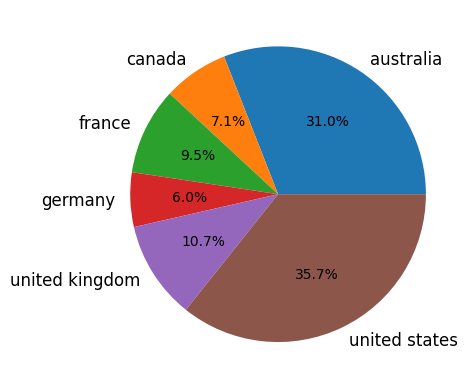


FIGURE 3:Total number of sales by Country and State


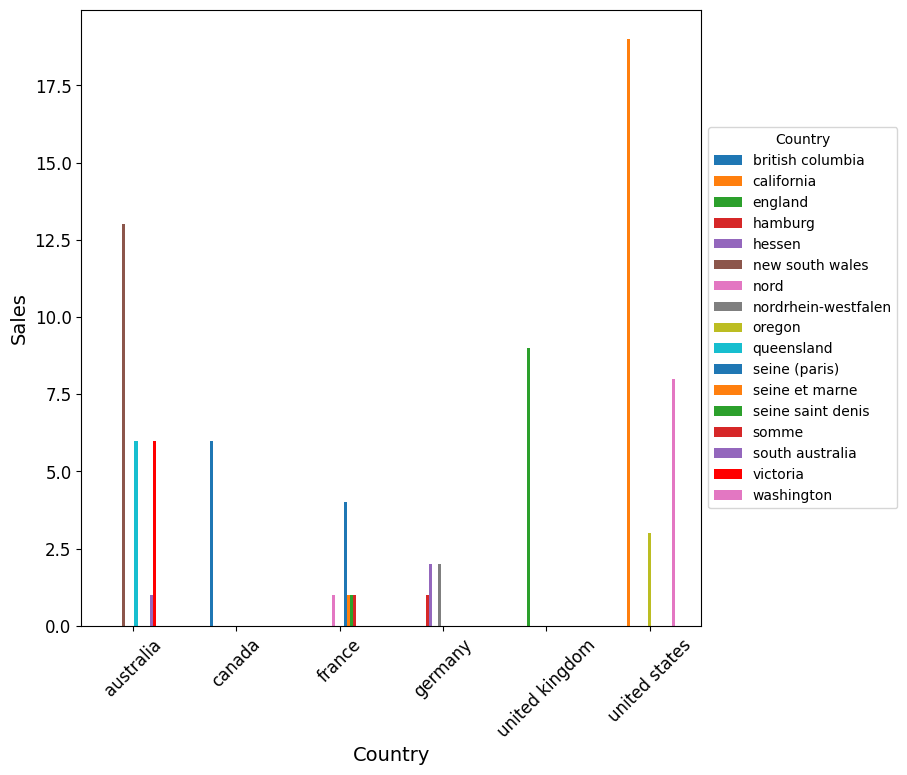

In [2]:
#@title Contry and State sales analysis
# Calculate the total sales for each country
print('FIGURE 2:Total number of sales by Country in %')
country_sales = processed_data.groupby('country')['sales_order #'].count()
# Create a pie chart
plt.pie(country_sales, labels=country_sales.index, autopct="%1.1f%%")
#plt.title("Sales Distribution by Country")
plt.show()

# Calculate the sales per state-------------------------------------------------------------------------
sales_by_country_state = processed_data.groupby(['country', 'state'])['sales_order #'].count().unstack()

# Create a bar chart
print('\nFIGURE 3:Total number of sales by Country and State')
ax = sales_by_country_state.plot(kind='bar', figsize=(10, 8))
# Add title and labels
#plt.title('Sales by Country and State')
plt.xlabel('Country')
plt.ylabel('Sales')

# Change the color of the "Victoria" state to red
for i, container in enumerate(ax.containers):
    if sales_by_country_state.columns[i] == 'victoria':
        for patch in container.patches:
            patch.set_facecolor('red')
            #print("colour changed")

# Place the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Country')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the chart
plt.show()


FIGURE 4:Distribution of Bike sales per day on December


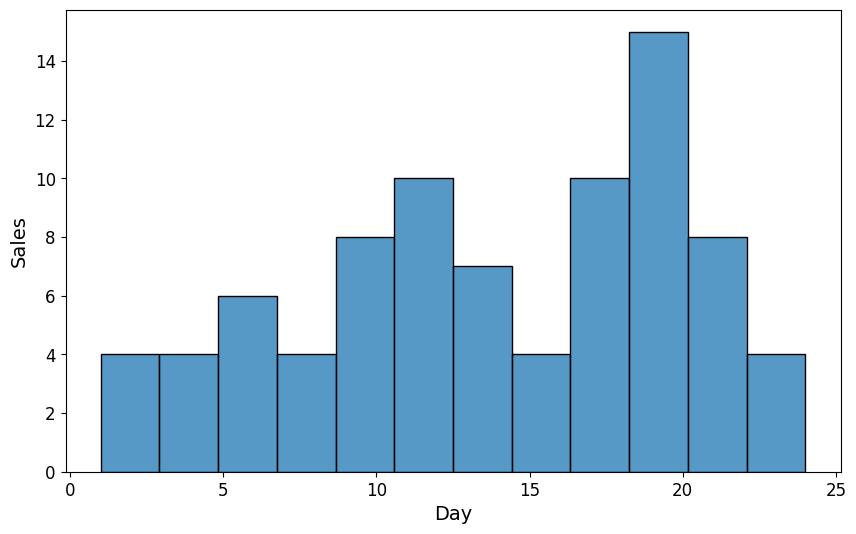

In [3]:
#@title Sales Analysis per day

# Sales per day------------------------------------------
print('\nFIGURE 4:Distribution of Bike sales per day on December')
# Create the figure with the specified size
plt.figure(figsize=(10, 6))
# create histogram using seaborn
sns.histplot(data=processed_data, x="day", bins=12)
#plt.figure(figsize=(10, 6))
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()




FIGURE 5:Bike models sold by country


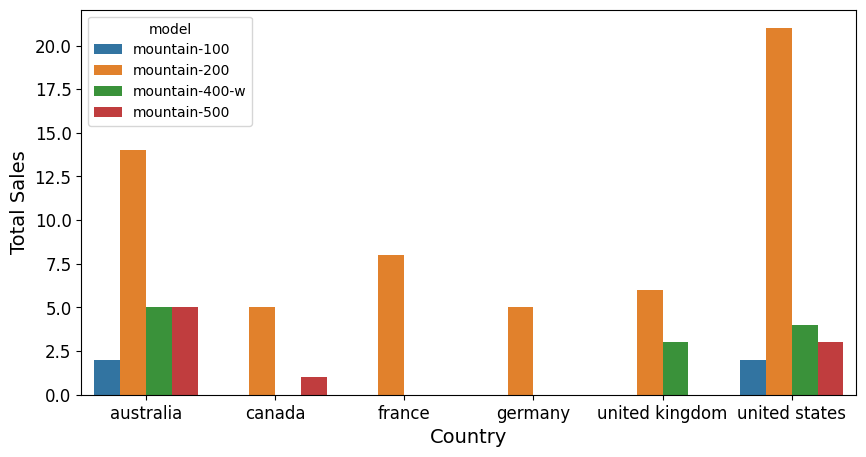

In [5]:
#@title Model sales analysis
# SALES BY COUNTRY AND MODEL------------------------------------------
print('\nFIGURE 5:Bike models sold by country')
sales_by_country_model = pd.crosstab(processed_data["country"], processed_data["model"], values=processed_data["sales_order #"], aggfunc="count").reset_index()
# Prepare data for bar chart
data = sales_by_country_model.melt(id_vars="country", var_name="model", value_name="sales")
# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="country", y="sales", hue="model", data=data)
#plt.title("Sales of Each Country and Model")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()


FIGURE 6:Distribution Customer age


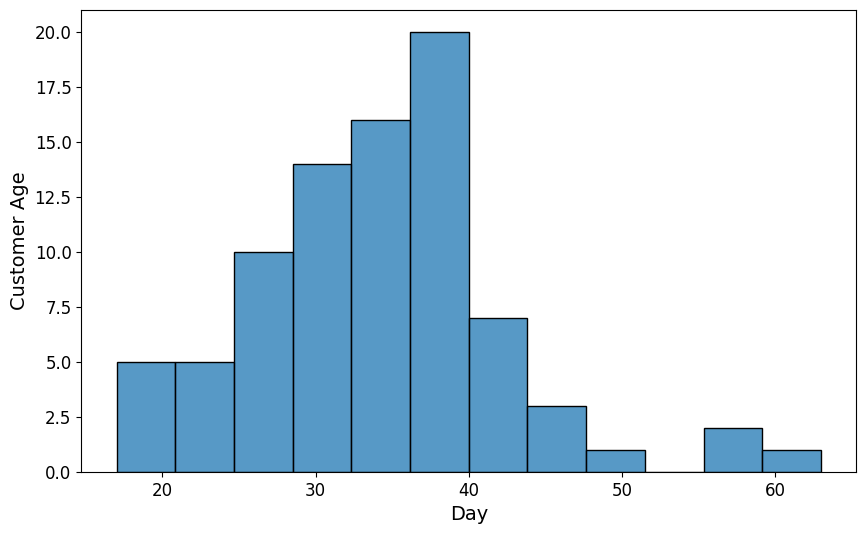


FIGURE 7:Sales by Country and Age Group


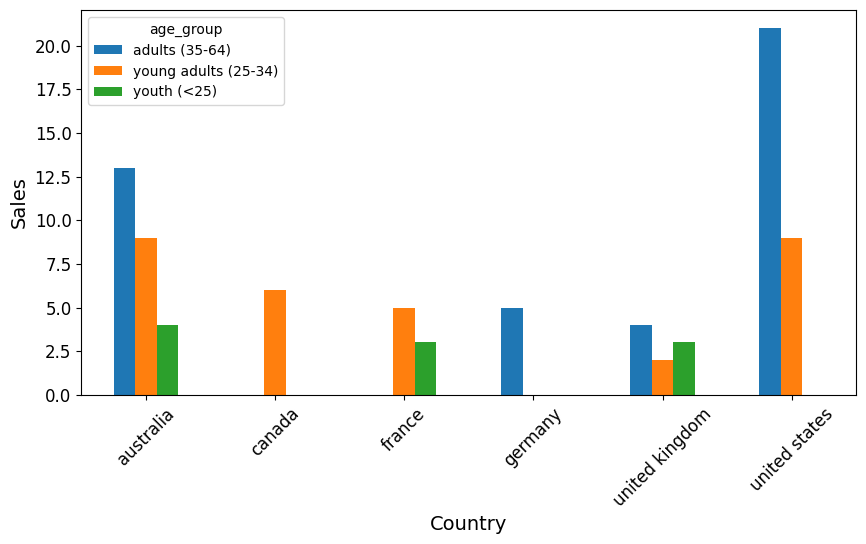

In [6]:
#@title  Demographics sales analysis



#SALES BY COUNTRY AND PEOPLE----------------------------------
# Histogram
# Sales per day------------------------------------------
print('\nFIGURE 6:Distribution Customer age')
# Create the figure with the specified size
plt.figure(figsize=(10, 6))
# create histogram using seaborn
sns.histplot(data=processed_data, x="customer_age", bins=12)
#plt.figure(figsize=(10, 6))
plt.xlabel('Day')
plt.ylabel('Customer Age')
plt.show()

#per country
print('\nFIGURE 7:Sales by Country and Age Group')
sales_by_country_age = pd.crosstab(processed_data['country'], processed_data['age_group'], values=processed_data['sales_order #'], aggfunc='count')

sales_by_country_age.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Country')
plt.ylabel('Sales')
#plt.title('Sales by Country and Age Group')
plt.xticks(rotation=45)
plt.show()

## 3.2 Profit descriptive data analysis

This section analyses profit performance across the different braches in December 2021, and aims to identify profitable countries by anwering the following questions:

* What was the total profit generated from bike sales in each country and state?
* What was the average profit per unit sold?

### Regional profit performance
The analysis of profits across countries and regions reveals interesting patterns. Figures 9 and 10 show the distribution of profits. We can see from Figure 8 that the United States and Australia generated the highest profits, while Canada and the United Kingdom had the lowest. In terms of regions and states (Figure 9), California and New South Wales (NSW) had the highest profits.  Unlike sales figures, profit distribution appears more even across some countries, such as Australia. It is also worth noting that the UK had low profits compared to its sales volume, while France exhibited the opposite trend.

### Model profit performance
Figure 11 illustrates the average profitability per bicycle model. Models 100 and 200 are clearly the most profitable, with model 100 being nearly twice as profitable as model 200. Models 400 and   500, on the other hand, are the budget options. While their profit margins are roughly similar to the high-end models, their profit per unit sold is less than half that of the best-selling mountain bike model 200.





FIGURE 9:Total profits per country (%):



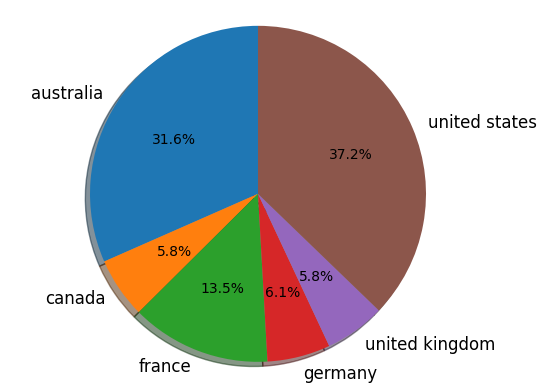


FIGURE 11:Total profit by Country and State


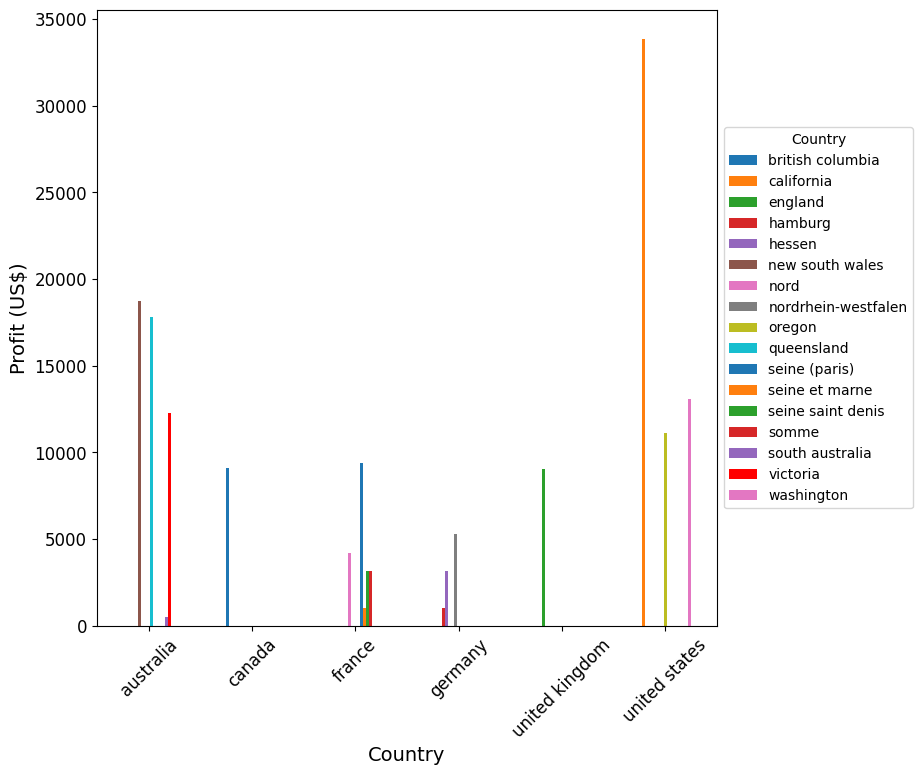

In [9]:
#@title Profitability Analysis
#Revenue BY COUNTRY AND PEOPLE
# Calculate the total revenue per country
country_revenue = processed_data.groupby('country')['profit'].sum()
# Print the total revenue for each country
#print(f"Total profits per country (%):\n")
#print(country_revenue)

# Total profits a pie chart
print(f"\nFIGURE 9:Total profits per country (%):\n")
labels = country_revenue.index.to_list()
sizes = country_revenue.values.tolist()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
#plt.title("Total Revenue from Bike Sales per Country")
plt.show()

# Profit distributions per state---------------------------
profits_by_country_state = processed_data.groupby(['country', 'state'])['profit'].sum().unstack()
# Create a bar chart
print('\nFIGURE 11:Total profit by Country and State')
ax = profits_by_country_state.plot(kind='bar', figsize=(10, 8))
# Add title and labels
#plt.title('Sales by Country and State')
plt.xlabel('Country')
plt.ylabel('Profit (US$)')

# Change the color of the "Victoria" state to red
for i, container in enumerate(ax.containers):
    if profits_by_country_state.columns[i] == 'victoria':
        for patch in container.patches:
            patch.set_facecolor('red')
            #print("colour changed")

# Place the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the chart
plt.show()


FIGURE 11:Total costs and profits per model:



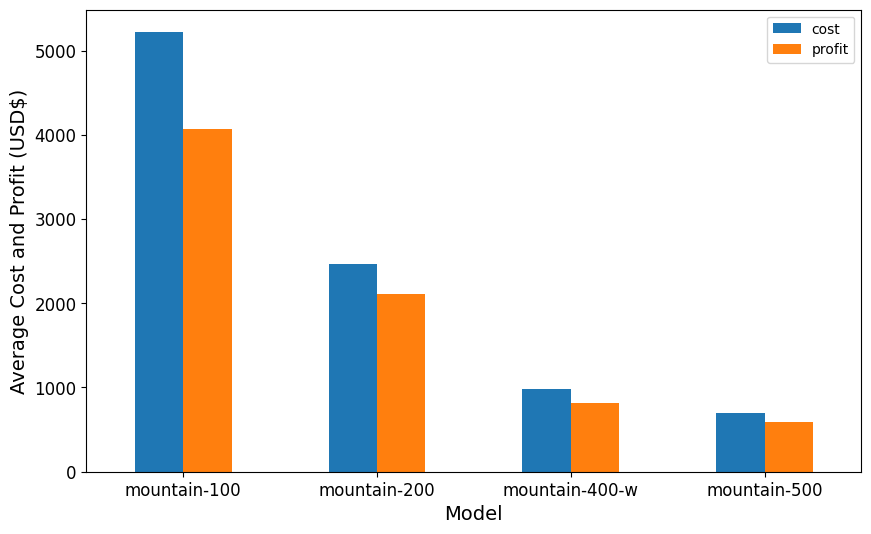

In [8]:
#@title Model Profitability
# Profit per model by country--------------------------------------------------------
# What is the cost of the each model per country?
# Group the data by country and model
#grouped_data = processed_data.groupby(["country", "model"])["profit"].mean().unstack()
#grouped_data = processed_data.groupby([ "model"])["profit"].mean()

# Create a bar chart
# Group the data by model and calculate the mean of cost and profit
grouped_data = processed_data.groupby("model")[["cost", "profit"]].mean()

# Create a bar chart
print(f"\nFIGURE 11:Total costs and profits per model:\n")
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind="bar", ax=ax)

# Add labels and title
ax.set_xlabel("Model")
ax.set_ylabel("Average Cost and Profit (USD$)")
#ax.set_title("Average Cost and Profit of Each Bike Model")
# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

## 3.3 Cost descriptive data Analysis:
This section analyzes costs across different branches in December 2021, aiming to identify cost efficiency variations between countries and models by addressing the following questions:

* What were the total bike sales costs incurred in each country?
* Which country had the highest and lowest average operating costs?

### Total costs

Figure 12 and Table 12 show the total operating cost and profit margin across the branches. From the figure it can be seen that at the same profit margin, the USA and Australia have the highest total costs, followed by france in the third place.  

### Average costs
Figure 14, on the other hand, shows the average cost per country. From the picture it is seen that France incurs the highest average cost per country
despite The USA having the largest overall costs. This translates to a 7% and 15% extra costs for the company to operate in France compared to the USA and UK, respectively at the same profit margin.




TABLE 12: Profit ratio per country
                   cost   profit  profit_proportion
country                                            
australia       2304.92  1895.50              45.13
canada          1826.17  1520.50              45.43
france          3149.25  2622.62              45.44
germany         2273.20  1892.80              45.43
united kingdom  1211.11  1008.00              45.42
united states   2214.00  1934.63              46.63

FIGURE 13:Total  costs and profits per country:



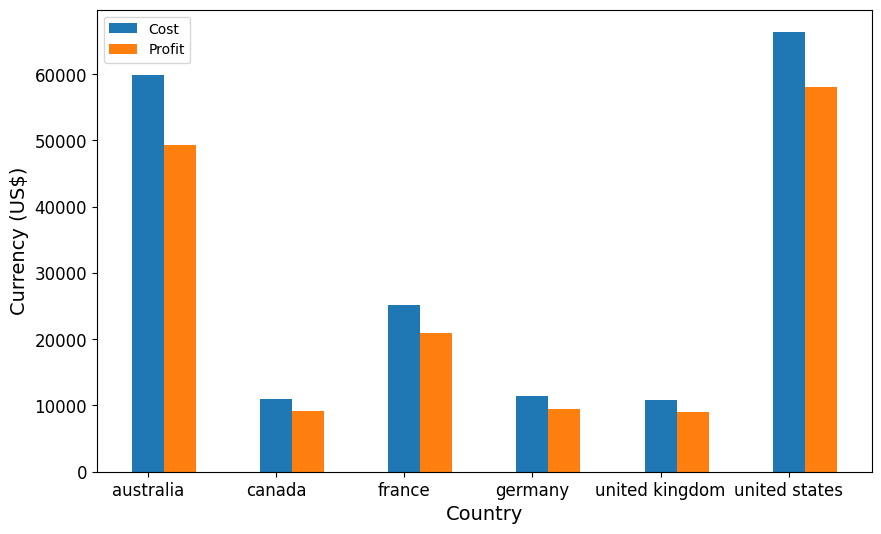

In [10]:
#@title Cost analysis per country
# Create a pivot table--------------------------------------------------------
# Create a pivot table with country as the index and cost and profit as columns
pivot_table = pd.pivot_table(processed_data, values=['cost', 'profit'], index='country')

# Calculate the proportion of profit for each country and convert it to a percentage
pivot_table['profit_proportion'] = (pivot_table['profit'] / (pivot_table['cost'] + pivot_table['profit'])) * 100
#pivot_table['cost_proportion'] = pivot_table['cost'] / (pivot_table['cost'] + pivot_table['profit'])

# Format the values to 2 decimal places
pivot_table = pivot_table.round({'cost': 2, 'profit': 2, 'profit_proportion': 2})
# Print the pivot table
print("\nTABLE 12: Profit ratio per country")
print(pivot_table)

# Total cost analysis per country--------------------------------
# Group the DataFrame by country and calculate the sum of revenue, cost, and profit
#grouped_data = processed_data.groupby('country')[['revenue', 'cost', 'profit']].sum()
grouped_data = processed_data.groupby('country')[['cost', 'profit']].sum()
# Reset the index to convert the MultiIndex to a single column
grouped_data = grouped_data.reset_index()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
# Create a bar chart with three bars per country: revenue, cost, and profit
print(f"\nFIGURE 13:Total  costs and profits per country:\n")
# Adjust positions for the bars
bar_width = 0.25
index = range(len(grouped_data))

#bar3 = ax.bar(index, grouped_data['revenue'], bar_width, label='Revenue')
bar2 = ax.bar([i + bar_width for i in index], grouped_data['cost'], bar_width, label='Cost')
bar1 = ax.bar([i + bar_width * 2 for i in index], grouped_data['profit'], bar_width, label='Profit')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Currency (US$)')
#ax.set_title('Sum of Revenue, Cost, and Profit by Country')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(grouped_data['country'])

# Add legend and show the plot
ax.legend()
plt.show()



FIGURE 14: Average total cost per country (%):



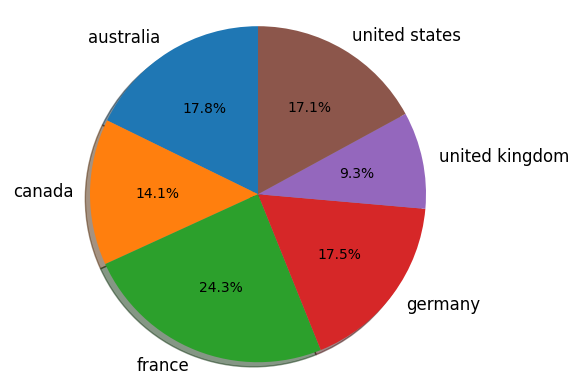

In [11]:
#@title Average cost analysis per country
# Average cost analysis per country
# Calculate the total cost per country---------------------------------
print(f"\nFIGURE 14: Average total cost per country (%):\n")
country_costs = processed_data.groupby('country')['cost'].mean()
# Create a pie chart
labels = country_costs.index.to_list()
sizes = country_costs.values.tolist()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
#plt.title("Total Costs per Country")
plt.show()

# 4 Discussions (results and insights)

### Sales
Sales data reveals a trend of late Christmas shopping, with peaks around the 20th of each month (Figure 4). This can be attributed to factors like time constraints and fortnightly pay cycles. Regarding sales by country, the US and Australia lead across branches, contributing 31% and 36% respectively. Regionally, California and New South Wales (NSW) top sales and profits. Both are the largest states in their respective countries (US and Australia). California exemplifies the tendency for larger states to concentrate sales, with Germany being a notable exception. For instance, NSW is larger than Victoria, and Seine-Saint-Denis (near Paris) outperforms other French regions (Figure 3).

The best-selling bicycle was the Mountain 200, followed by the Mountain 400-W. The Mountain 100 performed the poorest. Despite being in the premium category with the Mountain 200, customers seem to find the 200 model offers better value for money. Affordable models (400 and 500) sold less than a third of total sales and were only available in three countries. The 400-W was the only model in this category considered an alternative (e.g., in the UK).

Demographically, the majority of customers are aged 25-50, with an average of 35 (Figure 6). However, this varies by country.For instance, Canada and France primarily attract young adults, while the US focuses on adult customers (Figure 7).

### Profits
Our analysis reveals a clear correlation between market size and profitability. The United States and Australia, with the highest sales volumes, also boast the most significant profit shares, at 31% and 37% respectively (Figure 11). This can be attributed not only to higher sales figures but also to the exclusive availability of Model 100 in these markets. Notably, Model 100 generates 70% more revenue than Model 200. Conversely, lower profitability in markets like the UK and Canada can be explained by a combination of factors. While sales figures play a role, a significant portion of sales in these regions consisted of lower-profit models.

### Costs

Operational costs further highlight regional disparities. France emerges as the most expensive country to operate in, with average costs exceeding the best-performing countries by 7% and the most affordable option, the UK, by 15%.  While the USA and Australia exhibit the highest total costs due to larger sales volumes, Canada and most European markets (excluding the UK) demonstrate a trend of higher average operational costs. This is particularly striking in the case of Germany, where operational costs are comparable to the US despite significantly lower sales figures. The phenomena can be explained by the number of sales, and taxes associated in Europe, which tends to be higher than in the USA. Althought The UK's is also in Europ, its relatively low operational cost structure can be attributed to its substantial sales volume of the lower-cost Model 400-W.



# 5 Conclusions and References
This report has proposed an analysis of the sales performance of the company's branches during December 2021. Descriptive analytics were employed, utilising internal company data to describe both sales performance and branch profitability based on sales volume, product categories, and customer demographics. From the results, the following key findings are highlighted:
1. The countries of the United States (USA) and Australia contributed the highest sales volume (65%), with California and New South Wales (NSW) being the top-performing states within these countries. Conversely, Germany and Canada exhibited lower sales figures (6% and 7.1%, respectively).
2. The Mountainbike-200 model emerged as the most popular choice across all branches. Models 400-W and 500 came second with a mach lower market share restricted to only three countries. In contrast, model 100 achieved the lowest sales volume and was sold in just two countries.
3. The customer base primarily comprised individuals aged 25 to 50, with an average age of 34.
4. The USA and Australia displayed the highest profitability shares (31% and 37%, respectively), while the United Kingdom (UK), Canada, and Germany exhibited the lowest (averaging 6%).
5. France incurred the highest average operational cost (25%), exceeding the USA (the most profitable country) by 7% and the UK (the most cost-effective) by 15%.

In conclusion, the United States and Australia emerged as the strongest markets in terms of sales and profitability. Additionally, the customer base primarily consisted of individuals in their mid-thirties, demonstrating a clear preference for the high-selling and profitable Mountainbike-200 model.

While this report addressed the company's performance in December 2021, the generalisation of these findings to other months remains unclear. Consequently, future research could involve collecting data encompassing a 12-month period across several years. This would enable the analysis of trends and incorporate prescriptive and predictive analytics to forecast future sales performance.